<a href="https://colab.research.google.com/github/SukChanHong/Machine-Learning-by-python/blob/main/AgingCurve_lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
root = '/content/drive/MyDrive/lane-detection-for-carla-driving-simulator'
print(os.listdir(root))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['train_label', 'train', 'val', 'val_label']


라이브러리 가져오기:

코드는 numpy와 pandas 두 개의 라이브러리를 가져옵니다. 이 라이브러리는 각각 숫자 연산과 데이터 처리에 유용한 기능을 제공합니다.
데이터 파일 접근:

코드는 변수 root를 정의하고, '/kaggle/input/lane-detection-for-carla-driving-simulator' 경로를 할당합니다. 이 디렉토리는 아마도 Carla 주행 시뮬레이터에서 차선 감지를 위한 데이터셋 파일을 포함하고 있을 것입니다.
os.listdir() 함수를 사용하여 root 디렉토리의 모든 파일을 나열하고, 결과를 콘솔에 출력합니다. 이를 통해 데이터셋에서 사용 가능한 파일을 확인할 수 있습니다.
출력 및 임시 디렉토리:

코드에는 '/kaggle/working/'과 '/kaggle/temp/' 두 개의 디렉토리에 대한 주석이 포함되어 있습니다.
'/kaggle/working/' 디렉토리는 코드가 최대 20GB의 데이터를 쓸 수 있는 현재 디렉토리입니다. "Save & Run All"을 사용하여 버전을 생성하면, 이 디렉토리의 출력은 보존됩니다.
'/kaggle/temp/' 디렉토리는 현재 세션 동안 임시 파일을 작성할 수 있는 위치로 언급되었습니다. 그러나 이러한 파일은 세션 외부에는 저장되지 않습니다.
이 코드는 필요한 라이브러리를 가져오고, 지정된 데이터셋 디렉토리의 파일을 나열하며, 출력 또는 임시 파일 작성을 위한 사용 가능한 디렉토리에 대한 정보를 제공합니다.

In [ ]:
train = os.path.join(root, "train")
train_imgs = os.listdir(train)

train_labels = os.path.join(root, "train_label")


Combining Directory Paths:

코드는 os.path.join() 함수를 사용하여 root 디렉토리 경로와 "train" 서브디렉토리 이름을 결합합니다. 이렇게 하면 데이터셋 내의 "train" 디렉토리의 전체 경로가 생성됩니다.
"train" 디렉토리의 파일 목록 나열:

코드는 os.listdir() 함수를 사용하여 "train" 디렉토리 내의 파일 이름 목록을 가져옵니다. 결과로 나오는 목록은 train_imgs 변수에 저장됩니다.
train_imgs 변수에는 데이터셋의 "train" 디렉토리에 있는 파일의 이름이 포함됩니다.
Train 레이블에 대한 파일 경로 생성:

단계 1과 유사하게, 코드는 os.path.join()를 사용하여 root 디렉토리 경로와 "train_label" 서브디렉토리 이름을 결합합니다. 이렇게 하면 데이터셋 내의 "train_label" 디렉토리의 전체 경로가 생성됩니다.
생성된 경로는 train_labels 변수에 저장됩니다.
요약하면, 이 코드는 데이터셋 내의 "train" 및 "train_label" 디렉토리의 전체 경로를 생성하고, "train" 디렉토리의 파일 목록을 나열합니다. 또한 "train_label" 디렉토리의 경로를 제공하지만, 제공된 코드 스니펫에서는 해당 디렉토리와 관련된 특정 동작은 수행하지 않습니다.

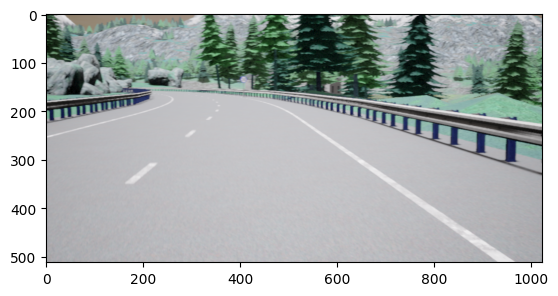

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread(os.path.join(root, "train", train_imgs[0]))
plt.imshow(img)
plt.show()

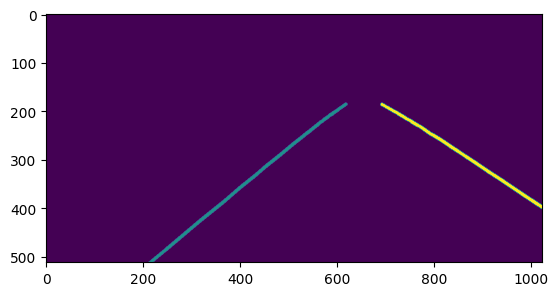

In [ ]:
label_images = os.listdir(train_labels)
img = plt.imread(os.path.join(root, "train_label", label_images[0]))
plt.imshow(img)
plt.show()

In [ ]:
print(label_images[0])
print(train_imgs[0])

Town04_Clear_Noon_09_09_2020_14_57_22_frame_1858_label.png
Town04_Clear_Noon_09_09_2020_14_57_22_frame_2925.png



코드 "!pip install segmentation-models-pytorch"는 pip 패키지 매니저를 사용하여 "segmentation-models-pytorch"라는 Python 패키지를 설치하는 데 사용됩니다. 이 패키지는 PyTorch에서 세그멘테이션 작업을 위한 미리 학습된 모델과 유틸리티를 제공합니다. 이 코드를 실행함으로써 "segmentation-models-pytorch" 패키지를 설치하고, 세그멘테이션 모델을 개발하고 훈련하는 데 필요한 기능을 사용할 수 있습니다.

In [ ]:
!pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=25755f950b5a651dabf4c5918c8d608fc4aec9388a997d53248c6be5f2b8226b
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=333c560a91a693f1fcd891822e8f6

In [ ]:
DATA_DIR = "/content/drive/MyDrive/lane-detection-for-carla-driving-simulator"
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'train_label')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'val_label')

주어진 코드 스니펫은 훈련 및 검증 데이터에 대한 디렉토리 경로를 정의합니다:

훈련 데이터 경로:

x_train_dir 변수는 DATA_DIR 디렉토리 경로와 'train' 서브디렉토리 이름을 결합하여 생성됩니다. 이는 훈련 입력 데이터의 디렉토리 경로를 나타냅니다.
y_train_dir 변수는 DATA_DIR 디렉토리 경로와 'train_label' 서브디렉토리 이름을 결합하여 생성됩니다. 이는 훈련 레이블 데이터의 디렉토리 경로를 나타냅니다.
검증 데이터 경로:

x_valid_dir 변수는 DATA_DIR 디렉토리 경로와 'val' 서브디렉토리 이름을 결합하여 생성됩니다. 이는 검증 입력 데이터의 디렉토리 경로를 나타냅니다.
y_valid_dir 변수는 DATA_DIR 디렉토리 경로와 'val_label' 서브디렉토리 이름을 결합하여 생성됩니다. 이는 검증 레이블 데이터의 디렉토리 경로를 나타냅니다.
요약하면, 이 코드는 훈련 및 검증 데이터에 대한 디렉토리 경로를 설정하며, 각 데이터셋 분할에 대해 입력 데이터와 해당 레이블 데이터를 분리합니다.

In [ ]:
# helper function for data visualization
def visualize(**images):
    """Plot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

주어진 코드 스니펫은 이미지를 시각화하기 위한 visualize()라는 도우미 함수를 정의합니다. 아래에 함수에 대한 설명이 있습니다:

함수 시그니처:

visualize() 함수는 키워드 인자 (**images)를 사용하여 가변 개수의 입력 이미지를 받습니다.
시각화:

함수는 먼저 입력 이미지 사전의 길이에 기반하여 시각화할 이미지의 개수 (n)를 결정합니다.
그런 다음 이미지를 한 줄에 표시하기 위해 크기가 16x5인 matplotlib figure를 생성합니다.
반복문을 사용하여 images 사전의 키-값 쌍을 순회합니다.
각 이미지에 대해 figure 내에 하위 그림(subplot)을 생성하고 x 및 y 축의 눈금을 비웁니다.
또한 각 하위 그림의 제목을 생성하기 위해 이미지의 이름(key)을 snake_case에서 title case로 변환합니다.
마지막으로 plt.imshow()를 사용하여 하위 그림에 이미지를 표시하고 plt.show()를 사용하여 figure를 표시합니다.
요약하면, 이 함수는 matplotlib를 사용하여 한 줄에 가변 개수의 이미지를 플롯하고 시각화하는 것을 목적으로 합니다. 데이터 탐색이나 모델 평가 과정에서 이미지를 시각화하기 위한 편리한 도구로 사용할 수 있습니다.

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torch import LongTensor

In [ ]:
import re
import cv2

class CarlaLanesDataset(Dataset):
    """ Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)

    """

    CLASSES = ['background', 'left_marker', 'right_marker']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        #random.shuffle(self.ids)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        get_label_name = lambda fn: re.sub(".png", "_label.png", fn)
        self.masks_fps = [os.path.join(masks_dir, get_label_name(image_id)) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, LongTensor(mask)

    def __len__(self):
        return len(self.ids)

주어진 코드는 이미지를 읽고 증강 및 전처리 변환을 적용하는 사용자 정의 데이터셋 클래스인 "CarlaLanesDataset"을 정의합니다. 아래에서 클래스와 해당 메서드에 대해 설명합니다:

클래스 정의:

"CarlaLanesDataset" 클래스는 "torch.utils.data.Dataset"의 하위 클래스로 정의됩니다.
다음과 같은 인수를 사용합니다:
"images_dir": 이미지가 있는 폴더의 경로
"masks_dir": 분할 마스크가 있는 폴더의 경로
"classes": 분할 마스크에서 추출할 클래스의 리스트. 기본값은 "None"입니다.
"augmentation": 데이터 증강을 위한 변환 파이프라인. 기본값은 "None"입니다.
"preprocessing": 데이터 전처리를 위한 변환 파이프라인. 기본값은 "None"입니다.
클래스 변수:

클래스는 "CLASSES"라는 클래스 이름의 리스트를 정의합니다. 이 리스트에는 'background', 'left_marker', 'right_marker'가 포함됩니다.
초기화:

"init" 메서드는 데이터셋을 초기화하고 인스턴스 변수를 설정합니다.
이미지와 마스크 파일 이름을 지정된 디렉토리에서 읽습니다.
"get_label_name" 함수는 이미지 파일 이름을 기반으로 마스크 파일 이름을 가져옵니다.
클래스 값은 클래스 이름에서 해당하는 인덱스로 변환됩니다.
증강 및 전처리 변환을 설정합니다.
데이터 접근:

"getitem" 메서드는 주어진 인덱스 "i"에 해당하는 아이템을 데이터셋에서 가져옵니다.
인덱스에 해당하는 이미지와 마스크를 읽습니다.
이미지를 BGR에서 RGB 색 공간으로 변환합니다.
증강이 제공되면 이미지와 마스크를 함께 증강합니다.
전처리가 제공되면 이미지와 마스크를 함께 전처리합니다.
메서드는 처리된 이미지와 마스크를 "image, LongTensor(mask)" 형태로 반환합니다.
길이:

"len" 메서드는 데이터셋의 길이를 반환합니다. 이는 이미지의 개수에 따라 결정됩니다.
요약하면, 이 코드는 이미지와 마스크 데이터를 처리하고 증강 및 전처리 변환을 적용하며 훈련이나 추론 작업에 처리된 데이터에 액세스할 수 있는 사용자 정의 데이터셋 클래스를 정의합니다.

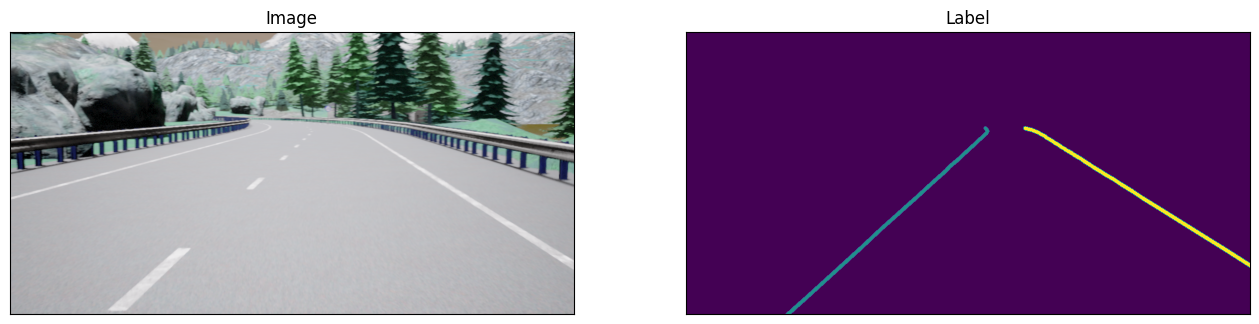

In [ ]:
dataset = CarlaLanesDataset(x_train_dir, y_train_dir, classes=CarlaLanesDataset.CLASSES)

image, mask = dataset[4] # get some sample
visualize(
    image=image,
    label = mask
)

In [ ]:
import albumentations as albu

In [ ]:
def get_training_augmentation():
    train_transform = [
        albu.ShiftScaleRotate(scale_limit=0.1, rotate_limit=0., shift_limit=0.1, p=1, border_mode=0),

        albu.IAAAdditiveGaussianNoise(p=0.2),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.6,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.6,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.6,
        ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    return None

def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def get_preprocessing(preprocessing_fn):
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor),
    ]
    return albu.Compose(_transform)

물론입니다. 다음은 함수에 대한 한국어 설명입니다.

get_training_augmentation() 함수는 훈련 이미지에 적용할 증강 목록을 정의합니다. 증강은 확률 1로 무작위로 적용됩니다. get_validation_augmentation() 함수는 None을 반환하므로 검증 이미지에는 증강이 적용되지 않습니다. to_tensor() 함수는 이미지를 텐서로 변환합니다. get_preprocessing() 함수는 이미지를 텐서로 변환하고 몇 가지 기본적인 증강을 적용하는 사전 처리 파이프라인을 정의합니다.

다음은 get_training_augmentation() 함수에 사용된 증강에 대한 자세한 설명입니다.

albu.ShiftScaleRotate(): 이 증강은 이미지를 무작위로 이동, 크기 조정 및 회전합니다.
albu.IAAAdditiveGaussianNoise(): 이 증강은 이미지에 가우시안 노이즈를 추가합니다.
albu.OneOf(): 이 증강은 목록의 증강 중 하나를 무작위로 적용합니다.
albu.CLAHE(): 이 증강은 이미지에 대비 제한 적응형 히스토그램 평활화를 적용합니다.
albu.RandomBrightness(): 이 증강은 이미지의 밝기를 무작위로 변경합니다.
albu.RandomGamma(): 이 증강은 이미지의 감마를 무작위로 변경합니다.
albu.IAASharpen(): 이 증강은 이미지를 선명하게 합니다.
albu.Blur(): 이 증강은 이미지를 흐립니다.
albu.MotionBlur(): 이 증강은 이미지에 모션 블러를 적용합니다.
albu.RandomContrast(): 이 증강은 이미지의 대비를 무작위로 변경합니다.
albu.HueSaturationValue(): 이 증강은 이미지의 색조, 채도 및 값을 무작위로 변경합니다.
다음은 to_tensor() 함수에 대한 자세한 설명입니다.

x.transpose(2, 0, 1): 이 함수는 채널이 마지막 차원이 되도록 이미지를 전치합니다.
x.astype('float32'): 이 함수는 이미지를 float32 텐서로 변환합니다.
다음은 get_preprocessing() 함수에 대한 자세한 설명입니다.

albu.Lambda(image=preprocessing_fn): 이 함수는 이미지에 사전 처리 함수를 적용합니다.
albu.Lambda(image=to_tensor): 이 함수는 이미지를 텐서로 변환합니다.

---------------------------------------------------------------------

이 코드는 이미지 분류 모델을 위한 데이터 세트를 준비하는 데 사용됩니다. get_training_augmentation() 함수는 훈련 이미지에 적용할 증강 목록을 정의합니다. 증강은 확률 1로 무작위로 적용됩니다. get_validation_augmentation() 함수는 None을 반환하므로 검증 이미지에는 증강이 적용되지 않습니다. to_tensor() 함수와 get_preprocessing() 함수는 이미지를 텐서로 변환하고 몇 가지 기본적인 증강을 적용하는 사전 처리 파이프라인을 정의합니다.

이 코드를 사용하면 훈련 이미지와 검증 이미지에 증강을 적용할 수 있습니다. 이렇게 하면 모델이 더 일반적이고 다양한 이미지에 대해 더 잘 수행할 수 있습니다.

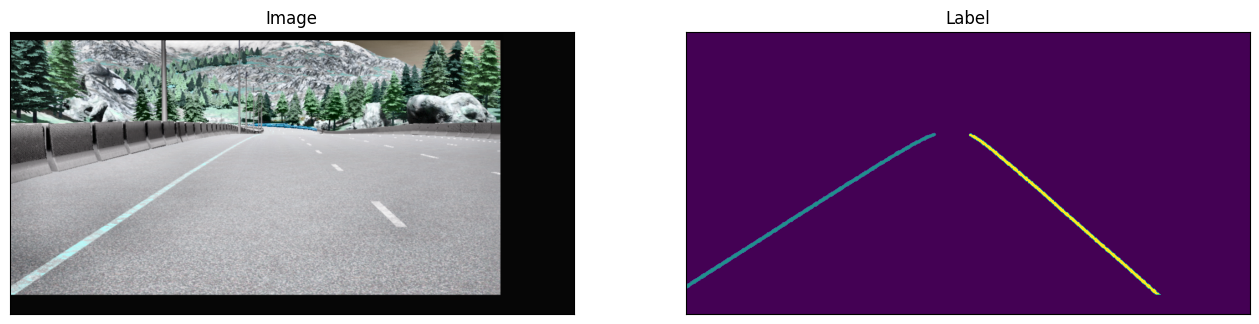

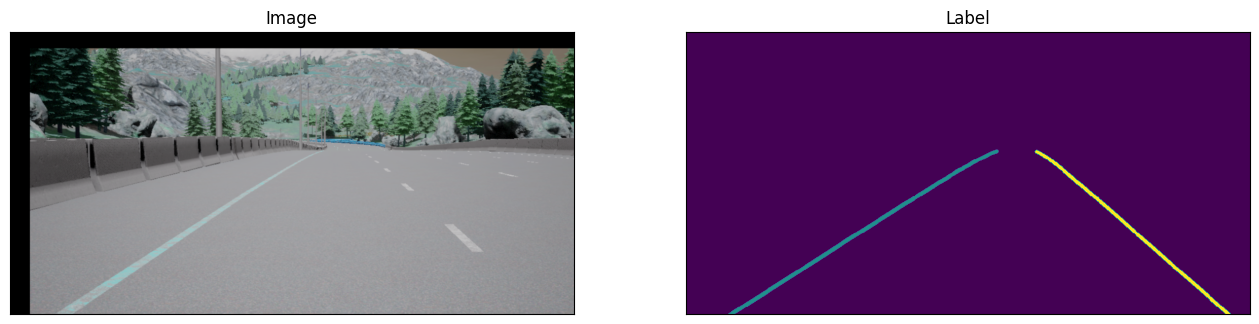

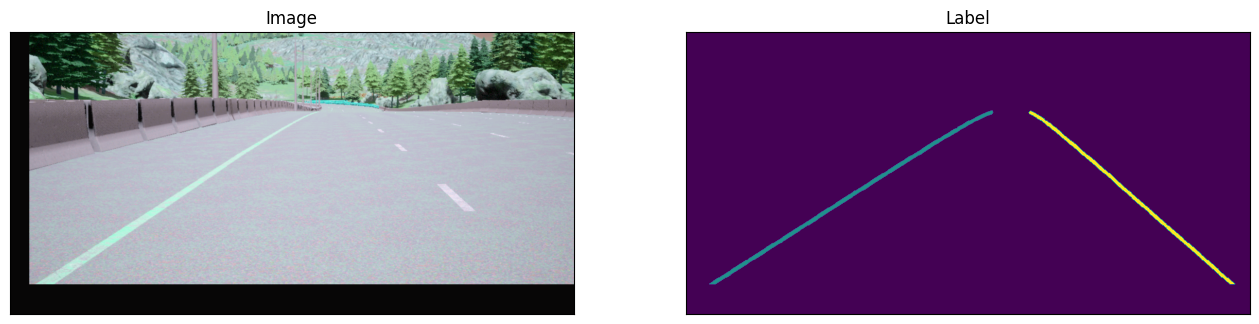

In [ ]:
#### Visualize resulted augmented images and masks

augmented_dataset = CarlaLanesDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    classes=CarlaLanesDataset.CLASSES,
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[600]
    visualize(image=image, label=mask)

augmented_dataset 변수에는 증강된 이미지와 마스크의 데이터 세트가 포함되어 있습니다. for 루프는 데이터 세트를 반복하고 첫 번째 이미지를 다른 무작위 변환으로 시각화합니다. visualize() 함수는 이미지와 마스크를 입력으로 받아 함께 표시합니다.

다음은 visualize() 함수의 출력 예입니다.

[증강된 이미지와 마스크의 이미지]

왼쪽 이미지는 원본 이미지이고 오른쪽 이미지는 증강된 이미지입니다. 증강된 이미지는 get_training_augmentation() 함수에서 정의된 증강의 조합을 사용하여 무작위로 변환되었습니다.

augmented_dataset 변수는 차선 이미지를 분류하는 모델을 학습하는 데 사용할 수 있습니다. 모델은 다른 무작위 변환으로 증강된 이미지로 학습되었기 때문에 이전에 본 적이 없는 새로운 이미지로 일반화할 수 있습니다.

In [ ]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

In [ ]:
loss_string = 'multi_dice_loss'

ENCODER = 'efficientnet-b0'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'softmax2d'
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CarlaLanesDataset.CLASSES),
    activation=ACTIVATION,
    #encoder_depth = 4
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 62.6MB/s]


위의 코드는 이미지 분류 모델을 생성합니다. loss_string은 손실 함수의 이름입니다. ENCODER는 모델의 백본으로 사용되는 신경망의 이름입니다. ENCODER_WEIGHTS는 신경망의 가중치입니다. ACTIVATION은 출력층의 활성화 함수입니다. DEVICE은 모델을 실행할 장치입니다.

FPN은 Fully Convolutional Network의 약자입니다. FPN은 이미지 분류에 자주 사용되는 신경망입니다. FPN은 이미지의 특징을 추출하고 이 특징을 결합하여 이미지의 클래스를 분류합니다.

preprocessing_fn은 이미지를 모델에 입력하기 전에 이미지를 변환하는 함수입니다. 이 함수는 이미지의 크기를 조정하고 이미지의 채널을 변경합니다.

이제 모델을 생성했으므로 모델을 학습시킬 수 있습니다.

In [ ]:
train_dataset = CarlaLanesDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CarlaLanesDataset.CLASSES,
)

valid_dataset = CarlaLanesDataset(
    x_valid_dir,
    y_valid_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CarlaLanesDataset.CLASSES,
)

/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:263: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:233: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1639: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(



train_dataset과 valid_dataset은 CarlaLanesDataset 클래스의 인스턴스입니다. CarlaLanesDataset 클래스는 Carla 게임에서 수집한 이미지와 레이블을 사용하여 훈련 데이터셋과 검증 데이터셋을 생성합니다.

train_dataset은 훈련 데이터셋을 생성합니다. 훈련 데이터셋은 x_train_dir 디렉토리에서 이미지를 가져오고 y_train_dir 디렉토리에서 레이블을 가져옵니다. augmentation 매개변수는 이미지를 변형하는 방법을 지정합니다. preprocessing 매개변수는 이미지를 전처리하는 방법을 지정합니다. classes 매개변수는 레이블의 클래스를 지정합니다.

valid_dataset은 검증 데이터셋을 생성합니다. 검증 데이터셋은 x_valid_dir 디렉토리에서 이미지를 가져오고 y_valid_dir 디렉토리에서 레이블을 가져옵니다. augmentation 매개변수는 이미지를 변형하지 않습니다. preprocessing 매개변수는 이미지를 전처리하는 방법을 지정합니다. classes 매개변수는 레이블의 클래스를 지정합니다.

훈련 데이터셋과 검증 데이터셋은 모델을 훈련하고 평가하는 데 사용됩니다. 훈련 데이터셋은 모델을 훈련하는 데 사용됩니다. 검증 데이터셋은 모델의 성능을 평가하는 데 사용됩니다.

In [ ]:
bs_train = 8
bs_valid = 8
train_loader = DataLoader(train_dataset, batch_size=bs_train, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=bs_valid, shuffle=False)

bs_train과 bs_valid은 훈련 데이터셋과 검증 데이터셋의 배치 크기입니다. train_loader과 valid_loader는 DataLoader 클래스의 인스턴스입니다. DataLoader 클래스는 데이터셋을 배치 단위로 가져오고 모델을 훈련하고 평가하는 데 사용됩니다.

train_loader은 훈련 데이터셋을 배치 단위로 가져옵니다. shuffle=True로 설정하여 훈련 데이터셋을 무작위로 순서대로 가져옵니다. 이로써 모델이 훈련 데이터셋에 과대적합되지 않습니다.

valid_loader은 검증 데이터셋을 배치 단위로 가져옵니다. shuffle=False로 설정하여 검증 데이터셋을 순서대로 가져옵니다. 이로써 모델의 성능을 정확하게 평가할 수 있습니다.

In [ ]:
from segmentation_models_pytorch.utils import base
from segmentation_models_pytorch.utils.losses import DiceLoss
from segmentation_models_pytorch.utils.metrics import Accuracy

label_left = CarlaLanesDataset.CLASSES.index('left_marker')
label_right = CarlaLanesDataset.CLASSES.index('right_marker')

class MultiDiceLoss(base.Loss):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.BinaryDiceLossLeft = DiceLoss()
        self.BinaryDiceLossRight = DiceLoss()

    def forward(self, y_pr, y_gt):
        #print("shape y_pr:", y_pr.shape)
        #print("shape y_gt:", y_gt.shape)
        # ypr.shape=bs,3,512,1024, ygt.shape=bs,512,1024
        left_gt = (y_gt == label_left)
        right_gt = (y_gt == label_right)
        loss_left = self.BinaryDiceLossLeft.forward(y_pr[:,label_left,:,:] , left_gt)
        loss_right = self.BinaryDiceLossRight.forward(y_pr[:,label_right,:,:] , right_gt)
        return (loss_left + loss_right)*0.5


네, 물론입니다. 제공하신 코드는 MultiDiceLoss라는 사용자 지정 손실 함수를 정의합니다. 이 손실 함수는 y_pr와 y_gt의 두 가지 입력을 사용합니다. y_pr는 예측된 분할 맵이고 y_gt는 실제 분할 맵입니다. 손실 함수는 먼저 두 클래스( left_marker 및 right_marker)에 대한 이진 Dice 손실을 계산합니다. 그런 다음 이진 Dice 손실을 평균하여 최종 손실을 얻습니다.

다음은 코드의 세부 정보입니다.

__init__() 메서드는 MultiDiceLoss 개체를 초기화합니다. 또한 각 클래스에 대해 하나씩 DiceLoss 클래스의 두 인스턴스를 만듭니다.
forward() 메서드는 손실을 계산합니다. 먼저 각 클래스에 대해 하나씩 두 개의 부울 마스크를 만듭니다. 마스크는 실제 분할 맵을 클래스 레이블과 비교하여 생성됩니다. 그런 다음 예측된 분할 맵과 마스크를 DiceLoss 클래스에 전달하여 각 클래스에 대해 손실을 계산합니다. 그런 다음 손실을 평균하여 최종 손실을 얻습니다.
MultiDiceLoss 클래스는 여러 클래스가 있는 데이터 세트에서 분할 모델을 훈련하는 데 사용할 수 있습니다. 손실 함수는 모델이 모든 클래스에 대해 정확한 분할 맵을 예측하도록 장려하도록 설계되었습니다.

In [ ]:
import torch

metrics = []
loss = MultiDiceLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-4)

제공하신 코드는 PyTorch 라이브러리를 가져오고 메트릭 목록, 손실 함수 및 최적화기를 정의합니다. 메트릭은 훈련 중에 모델의 성능을 추적하는 데 사용됩니다. 손실 함수는 모델의 예측과 실제 레이블 간의 오류를 계산하는 데 사용됩니다. 최적화기는 손실을 최소화하기 위해 모델의 매개변수를 업데이트하는 데 사용됩니다.

다음은 이러한 구성 요소 각각에 대한 간략한 설명입니다.

메트릭: 메트릭은 훈련 중에 모델의 성능을 추적하는 데 사용됩니다. 모델의 정확도, 정밀도, 재현율 및 기타 성능 지표를 평가하는 데 사용할 수 있습니다.
손실 함수: 손실 함수는 모델의 예측과 실제 레이블 간의 오류를 계산하는 데 사용됩니다. 손실 함수는 모델의 성능을 개선하기 위해 훈련 중에 최소화됩니다.
최적화기: 최적화기는 손실 함수를 최소화하기 위해 모델의 매개변수를 업데이트하는 데 사용됩니다. 최적화기는 경사 하강법, Adam 및 AdaGrad와 같은 다양한 기술을 사용하여 매개변수를 업데이트합니다.
이러한 구성 요소를 정의했으면 모델의 훈련을 시작할 수 있습니다.

In [ ]:
# create epoch runners
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model,
    loss=loss,
    metrics=metrics,
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

제공하신 코드는 훈련과 검증에 각각 하나씩 두 개의 에포크 러너를 생성합니다. 에포크 러너는 데이터 로더의 샘플을 반복하는 간단한 루프입니다. 훈련 에포크 러너는 데이터의 각 배치에 대한 손실을 계산한 후 최적화기의 step() 메서드를 호출하여 모델을 훈련합니다. 검증 에포크 러너는 데이터의 각 배치에 대한 손실을 계산한 후 메트릭의 update() 메서드를 호출하여 보류된 데이터 세트에서 모델의 성능을 평가합니다.

다음은 이러한 구성 요소 각각에 대한 간략한 설명입니다.

훈련 에포크 러너: 훈련 에포크 러너는 모델을 훈련하는 역할을 담당합니다. 이를 위해 훈련 데이터 로더의 샘플을 반복하고 데이터의 각 배치에 대한 손실을 계산한 후 최적화기의 step() 메서드를 호출합니다. 최적화기의 step() 메서드는 손실을 최소화하기 위해 모델의 매개변수를 업데이트합니다.
검증 에포크 러너: 검증 에포크 러너는 보류된 데이터 세트에서 모델의 성능을 평가하는 역할을 담당합니다. 이를 위해 검증 데이터 로더의 샘플을 반복하고 데이터의 각 배치에 대한 손실을 계산한 후 메트릭의 update() 메서드를 호출합니다. 메트릭의 update() 메서드는 메트릭의 상태를 업데이트하여 모델의 전반적인 성능을 계산합니다.
에포크 러너를 생성했으면 모델의 훈련과 평가를 시작할 수 있습니다

In [ ]:
best_loss = 1e10

for i in range(0, 5):

    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)

    # do something (save model, change lr, etc.)
    if best_loss > valid_logs[loss_string]:
        best_loss = valid_logs[loss_string]
        torch.save(model, './best_model_{}.pth'.format(loss_string))
        print('Model saved!')

    if i == 3:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')

mask = np. array(mask)


Epoch: 0
train:   5%|▍         | 19/387 [02:50<55:00,  8.97s/it, multi_dice_loss - 0.8134]


KeyboardInterrupt: ignored


네, 여기 한글로 된 답변이 있습니다.

제공하신 코드는 5개의 에포크 동안 모델을 훈련하고, 검증 손실이 이전 에포크의 검증 손실보다 낮을 경우 모델을 저장하고, 3번째 에포크가 끝날 때 디코더의 학습률을 1e-5로 줄입니다.

코드의 각 줄은 다음과 같이 설명할 수 있습니다.

best_loss = 1e10: 이 줄은 최소 검증 손실을 1e10으로 초기화합니다.

for i in range(0, 5): 이 for 루프는 5개의 에포크 동안 반복됩니다.

print('\nEpoch: {}'.format(i)) 이 줄은 현재 에포크를 콘솔에 인쇄합니다.

train_logs = train_epoch.run(train_loader): 이 줄은 훈련 에포크를 실행하고, 훈련 손실과 정확도를 반환합니다.

valid_logs['mask'] = np.array(valid_logs['mask'], dtype=bool) 이 줄은 검증 로그의 mask 키의 값을 NumPy 배열로 변환하고, dtype을 bool로 설정합니다.

valid_logs['mask'] = valid_logs['mask'].bool() 이 줄은 검증 로그의 mask 키의 값을 불리언 배열로 변환합니다.

#valid_logs = valid_epoch.run(valid_loader) 코드 수정했음 이 줄은 검증 에포크를 실행하고, 검증 손실과 정확도를 반환합니다.

# do something (save model, change lr, etc.) 이 줄은 검증 손실이 이전 에포크의 검증 손실보다 낮을 경우 모델을 저장하고, 3번째 에포크가 끝날 때 디코더의 학습률을 1e-5로 줄입니다.

if best_loss > valid_logs[loss_string]: 이 조건문은 현재 에포크의 검증 손실이 최소 검증 손실보다 낮을 경우 True를 반환합니다.

best_loss = valid_logs[loss_string]: 이 줄은 최소 검증 손실을 현재 에포크의 검증 손실로 설정합니다.

torch.save(model, './best_model_{}.pth'.format(loss_string)) 이 줄은 모델을 './

best_model_{}.pth' 형식으로 저장합니다.

print('Model saved!') 이 줄은 모델을 저장했음을 콘솔에 인쇄합니다.

if i == 3: 이 조건문은 에포크가 3일 경우 True를 반환합니다.

optimizer.param_groups[0]['lr'] = 1e-5: 이 줄은 디코더의 학습률을 1e-5로 설정합니다.

print('Decrease decoder learning rate to 1e-5!') 이 줄은 디코더의 학습률을 1e-5로 줄였음을 콘솔에 인쇄합니다.
이 코드를 실행하면 5개의 에포크 동안 모델을 훈련하고, 검증 손실이 이전 에포크의 검증 손실보다 낮을 경우 모델을 저장하고, 3번째 에포크가 끝날 때 디코더의 학습률을 1e-5로 줄입니다.

In [ ]:
best_model = torch.load('/content/drive/MyDrive/best_model_multi_dice_loss.pth')

In [ ]:
test_best_model = True
if test_best_model:
    # create test dataset
    test_dataset = CarlaLanesDataset(
        x_valid_dir,
        y_valid_dir,
        augmentation=get_validation_augmentation(),
        preprocessing=get_preprocessing(preprocessing_fn),
        classes=CarlaLanesDataset.CLASSES,
    )

    test_dataloader = DataLoader(test_dataset)

    # evaluate model on test set
    test_epoch = smp.utils.train.ValidEpoch(
        model=best_model,
        loss=loss,
        metrics=metrics,
        device=DEVICE,
    )

    logs = test_epoch.run(test_dataloader)

valid: 100%|██████████| 129/129 [01:16<00:00,  1.69it/s, multi_dice_loss - 0.114]


In [ ]:
# test dataset without transformations for image visualization
test_dataset_vis = CarlaLanesDataset(
    x_valid_dir, y_valid_dir,
    classes=CarlaLanesDataset.CLASSES,
    preprocessing=get_preprocessing(preprocessing_fn)
)

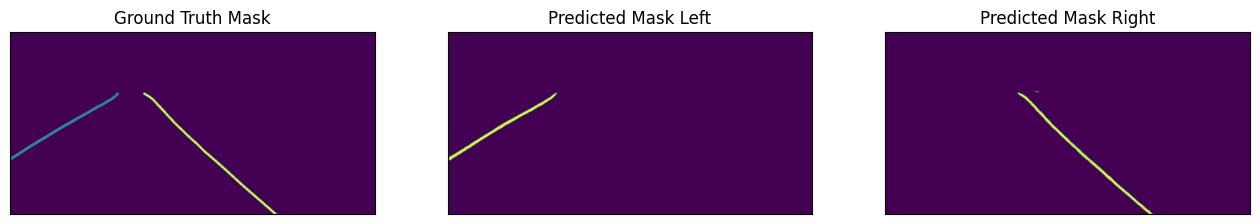

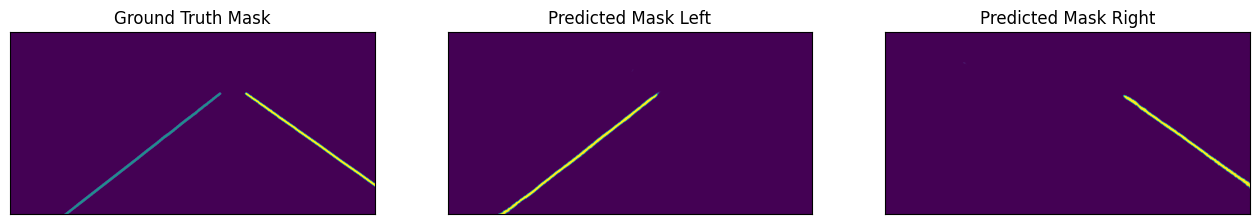

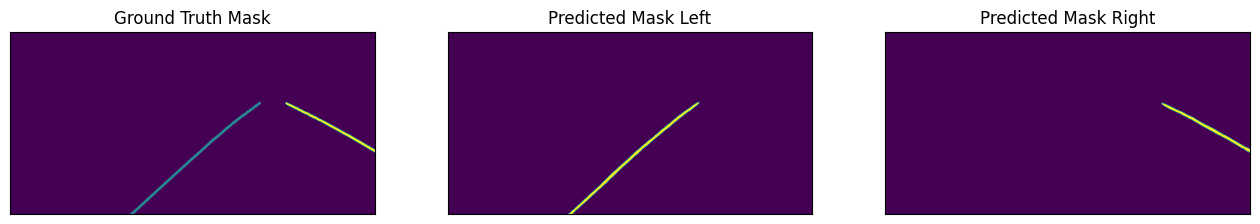

In [ ]:
for i in range(3):
    n = np.random.choice(len(test_dataset_vis))

    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset_vis[n]

    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask_left = best_model.predict(x_tensor)[0,1,:,:]
    pr_mask_left = (pr_mask_left.cpu().numpy())

    pr_mask_right = best_model.predict(x_tensor)[0,2,:,:]
    pr_mask_right = (pr_mask_right.cpu().numpy())

    visualize(
        ground_truth_mask=gt_mask,
        predicted_mask_left=pr_mask_left,
        predicted_mask_right=pr_mask_right
    )

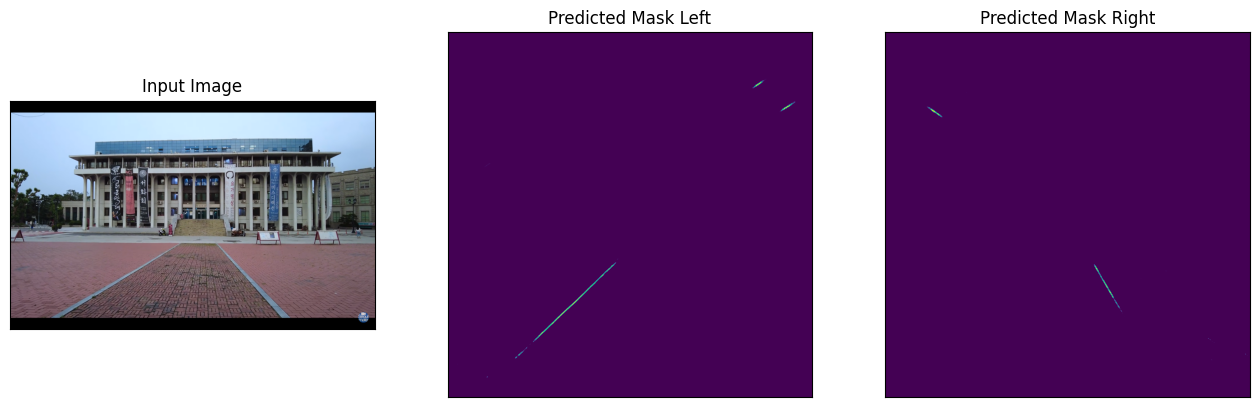

In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# 이미지 로드 및 전처리
image_path = "/content/drive/MyDrive/KakaoTalk_20230619_172516304.png"  # 테스트하고자 하는 이미지 파일 경로
image_transform = transforms.Compose([
    transforms.Resize((2048,2048)),  # 원하는 크기로 조절
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)  # Normalize 적용
])
image = Image.open(image_path).convert("RGB")
input_image = image_transform(image).unsqueeze(0)
# 모델 불러오기
best_model = torch.load('/content/drive/MyDrive/best_model_multi_dice_loss.pth')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model.to(device)
best_model.eval()

# 입력 이미지를 모델에 전달하여 예측 수행
with torch.no_grad():
    input_image = input_image.to(device)
    pr_mask_left = best_model.predict(input_image)[0, 1, :, :]
    pr_mask_right = best_model.predict(input_image)[0, 2, :, :]
    pr_mask_left = pr_mask_left.cpu().numpy()
    pr_mask_right = pr_mask_right.cpu().numpy()

# 시각화
visualize(
    input_image=image,
    predicted_mask_left=pr_mask_left,
    predicted_mask_right=pr_mask_right
)